<a href="https://colab.research.google.com/github/Marisa280/Detect_lumbar_spine/blob/main/train_yolo8_pose_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# train


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import random

# เส้นทางไปยังโฟลเดอร์ labels ที่มีไฟล์ทั้งหมด
label_dir = '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP'
train_dir = '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train'
val_dir = '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/val'

# สร้างโฟลเดอร์ train และ validation ถ้าไม่มี
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# สัดส่วนการแบ่งข้อมูล
train_ratio = 0.8

# รวบรวมไฟล์ทั้งหมดในโฟลเดอร์ labels
all_files = [f for f in os.listdir(label_dir) if f.endswith('.txt') or f.endswith('.jpg') or f.endswith('.csv')]

# สุ่มเรียงไฟล์ทั้งหมด
random.shuffle(all_files)

# แบ่งไฟล์เป็น train และ val ตามสัดส่วน
train_size = int(len(all_files) * train_ratio)
train_files = all_files[:train_size]
val_files = all_files[train_size:]

# ย้ายไฟล์ไปยังโฟลเดอร์ train และ val
for f in train_files:
    shutil.move(os.path.join(label_dir, f), os.path.join(train_dir, f))

for f in val_files:
    shutil.move(os.path.join(label_dir, f), os.path.join(val_dir, f))

print(f"Train files: {len(train_files)}")
print(f"Validation files: {len(val_files)}")


Train files: 960
Validation files: 240


In [ ]:
!mv /content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train/*.csv /content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/
!mv /content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/val/*.csv /content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/

In [ ]:
import yaml

data = {
    'train': '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train',
    'val': '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/val',
    'nc': 1,  # จำนวนคลาสของวัตถุ
    'names': ['spine'],
    'nkpt': 20,  # จำนวน keypoints
    'kpt_shape': [20, 2],  # รูปแบบ keypoint
    'kpt_names': [
        'L1a-left', 'L1a-right', 'L1b-left', 'L1b-right',
        'L2a-left', 'L2a-right', 'L2b-left', 'L2b-right',
        'L3a-left', 'L3a-right', 'L3b-left', 'L3b-right',
        'L4a-left', 'L4a-right', 'L4b-left', 'L4b-right',
        'L5a-left', 'L5a-right'
    ]
}

# บันทึกไฟล์ data.yaml ใน Google Drive
yaml_file_path = '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/data.yaml'
with open(yaml_file_path, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print(f"data.yaml created successfully at {yaml_file_path}")


data.yaml created successfully at /content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.52M/6.52M [00:00<00:00, 53.6MB/s]


In [ ]:
import os

# จำนวน yolo require
expected_columns = 45

# เส้นทางไปยังโฟลเดอร์ labels
label_dir = '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train'

for filename in os.listdir(label_dir):
    if filename.endswith('.txt'):
        label_file = os.path.join(label_dir, filename)
        with open(label_file, 'r') as file:
            lines = file.readlines()
            for line_num, line in enumerate(lines):
                columns = line.strip().split()
                if len(columns) != expected_columns:
                    print(f"Warning: File {filename}, line {line_num + 1} has {len(columns)} columns (expected {expected_columns})")
                else:
                    print(f"File {filename}, line {line_num + 1} is OK")

File 0007-F-006Y0.txt, line 1 is OK
File 0008-M-022Y0.txt, line 1 is OK
File 0001-F-037Y0.txt, line 1 is OK
File 0004-F-010Y0.txt, line 1 is OK
File 0009-F-038Y0.txt, line 1 is OK
File 0041-F-019Y0.txt, line 1 is OK
File 0024-F-014Y0.txt, line 1 is OK
File 0033-F-023Y0.txt, line 1 is OK
File 0014-F-062Y0.txt, line 1 is OK
File 0046-F-021Y0.txt, line 1 is OK
File 0031-F-014Y0.txt, line 1 is OK
File 0043-F-039Y0.txt, line 1 is OK
File 0020-M-030Y0.txt, line 1 is OK
File 0016-F-023Y0.txt, line 1 is OK
File 0044-F-022Y0.txt, line 1 is OK
File 0037-F-019Y0.txt, line 1 is OK
File 0025-F-015Y0.txt, line 1 is OK
File 0035-M-026Y0.txt, line 1 is OK
File 0023-F-014Y0.txt, line 1 is OK
File 0051-F-066Y0.txt, line 1 is OK
File 0042-F-019Y0.txt, line 1 is OK
File 0036-F-016Y0.txt, line 1 is OK
File 0015-M-020Y0.txt, line 1 is OK
File 0050-F-015Y0.txt, line 1 is OK
File 0029-M-019Y0.txt, line 1 is OK
File 0048-F-020Y0.txt, line 1 is OK
File 0028-F-041Y0.txt, line 1 is OK
File 0047-F-023Y0.txt, line 

In [ ]:
# Train the model
results = model.train(data="/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/data.yaml", epochs=100, imgsz=640)

KeyboardInterrupt: 


image 1/1 /content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train/0003-F-013Y0.jpg: 640x544 1 spine, 196.7ms
Speed: 3.8ms preprocess, 196.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


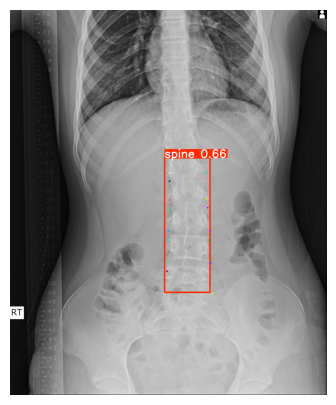

Saved file: /content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/output_images/0003-F-013Y0_kpt.jpg


In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path

# โหลดโมเดล
model = YOLO('/content/best.pt')

# ตรวจจับวัตถุในภาพ
image_path = '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train/0003-F-013Y0.jpg'
results = model(image_path)

# สร้างโฟลเดอร์ใหม่สำหรับเซฟภาพ
output_folder = Path('/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/output_images')
output_folder.mkdir(parents=True, exist_ok=True)  # สร้างโฟลเดอร์ถ้ายังไม่มี

# สร้างชื่อไฟล์ใหม่สำหรับเซฟภาพ
output_filename = Path(image_path).stem + '_kpt' + Path(image_path).suffix  # ต่อท้ายชื่อไฟล์ด้วย _kpt
output_fullpath = output_folder / output_filename  # บันทึกในโฟลเดอร์ใหม่

# แสดงและเซฟผลลัพธ์
for result in results:
    plt.figure(figsize=(10, 5))  # ตั้งค่าขนาดภาพ
    plt.imshow(result.plot())  # แสดงภาพที่มีการตรวจจับวัตถุ
    plt.axis('off')  # ปิดแกน
    plt.savefig(output_fullpath, bbox_inches='tight', pad_inches=0)  # เซฟภาพในโฟลเดอร์ใหม่
    plt.show()  # แสดงภาพ

print(f"Saved file: {output_fullpath}")


In [ ]:
!pip install torch torchvision torchaudio

# **ดูตรงนี้**

## เอาตำแหน่งออกมาแล้ว normalize แต่ยังไม่ได้พล็อต


image 1/1 /content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train/0003-F-013Y0.jpg: 640x544 1 spine, 9.0ms
Speed: 2.8ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)
Normalized XY Coordinates: [[[     0.5067     0.37491]
  [     0.6092     0.36854]
  [     0.5039     0.42348]
  [    0.62006     0.42291]
  [    0.50346      0.4445]
  [    0.61132     0.43623]
  [    0.50377     0.49349]
  [    0.61994     0.49088]
  [    0.50359     0.51855]
  [     0.6236     0.51356]
  [    0.50257     0.57495]
  [    0.63223     0.57348]
  [    0.50098     0.59724]
  [    0.62735     0.59769]
  [    0.49817     0.65576]
  [     0.6324     0.65814]
  [      0.495     0.67857]
  [    0.63194     0.67557]
  [    0.49463     0.73579]
  [    0.63782     0.73574]]]


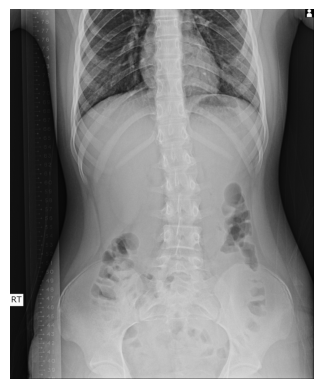

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# โหลดโมเดลที่ถูกฝึกไว้
model = YOLO('/content/best.pt')

# ทดสอบบนภาพ
image_path = '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train/0003-F-013Y0.jpg'
results = model.predict(source=image_path, show=False)

# ดึงข้อมูล keypoints จากผลลัพธ์
for result in results:
    if hasattr(result, 'keypoints'):
        keypoints = result.keypoints  # ดึง keypoints โดยตรง
        if keypoints is not None:
            # ดึงข้อมูล xy และ conf
            xy = keypoints.xy.cpu().numpy()  # พิกัด x, y
            conf = keypoints.conf.cpu().numpy() if keypoints.conf is not None else None  # ความเชื่อมั่น

            # ดึงขนาดของภาพ
            orig_shape = result.orig_shape  # ขนาดของภาพ (height, width)
            height, width = orig_shape

            # Normalization
            xy_normalized = xy / np.array([width, height])  # Normalize พิกัด x, y
            print("Normalized XY Coordinates:", xy_normalized)  # แสดงพิกัดที่ทำ normalization

            # แสดงผลภาพ
            image = result.orig_img  # ดึงภาพต้นฉบับ

            # แสดงภาพที่ไม่มี keypoints
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # แปลงสีจาก BGR เป็น RGB
            plt.axis('off')  # ไม่แสดงแกน
            plt.show()  # แสดงภาพ


## เอาตำแหน่งที่ได้มาลองพล็อต

ขนาดของภาพ: สูง = 2428, กว้าง = 1996, ช่องสี = 3


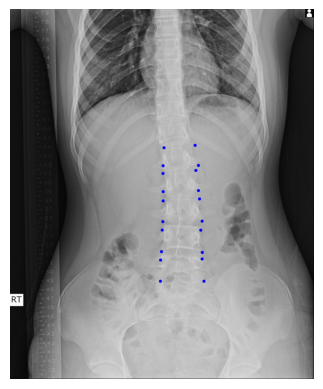

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# อ่านภาพจากไฟล์
image_path = '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train/0003-F-013Y0.jpg'
image = cv2.imread(image_path)

# ดึงขนาดของภาพ
height, width, channels = image.shape
print(f"ขนาดของภาพ: สูง = {height}, กว้าง = {width}, ช่องสี = {channels}")

# ข้อมูล keypoints ที่ normalized
keypoints_normalized = np.array([[[0.5067, 0.37491], #ใช้ตำแหน่งที่ได้จากโค้ดอันแรก
                                   [0.6092, 0.36854],
                                   [0.5039, 0.42348],
                                   [0.62006, 0.42291],
                                   [0.50346, 0.4445],
                                   [0.61132, 0.43623],
                                   [0.50377, 0.49349],
                                   [0.61994, 0.49088],
                                   [0.50359, 0.51855],
                                   [0.6236, 0.51356],
                                   [0.50257, 0.57495],
                                   [0.63223, 0.57348],
                                   [0.50098, 0.59724],
                                   [0.62735, 0.59769],
                                   [0.49817, 0.65576],
                                   [0.6324, 0.65814],
                                   [0.495, 0.67857],
                                   [0.63194, 0.67557],
                                   [0.49463, 0.73579],
                                   [0.63782, 0.73574]]])

# แปลงข้อมูล keypoints ให้เป็นพิกัดจริง
keypoints_real = keypoints_normalized * np.array([width, height])

# วาด keypoints ลงในภาพ
for i in range(keypoints_real.shape[1]):  # ใช้จำนวน keypoints ที่มี
    x, y = int(keypoints_real[0][i][0]), int(keypoints_real[0][i][1])  # แปลงเป็นจำนวนเต็ม
    cv2.circle(image, (x, y), 10, (255, 0, 0), -1)  # วาดจุด keypoint เป็นสีแดงและขนาดใหญ่ขึ้น

# แสดงภาพที่มี keypoints
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # แปลงสีจาก BGR เป็น RGB
plt.axis('off')  # ไม่แสดงแกน
plt.show()  # แสดงภาพ


## โค้ดนี้ทำได้แล้ว ลองเอาไปปรับแก้แล้วไป predict



image 1/1 /content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train/0003-F-013Y0.jpg: 640x544 1 spine, 8.9ms
Speed: 2.9ms preprocess, 8.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)
ขนาดของภาพ: สูง = 2428, กว้าง = 1996, ช่องสี = 3
Normalized XY Coordinates: [[[     0.5067     0.37491]
  [     0.6092     0.36854]
  [     0.5039     0.42348]
  [    0.62006     0.42291]
  [    0.50346      0.4445]
  [    0.61132     0.43623]
  [    0.50377     0.49349]
  [    0.61994     0.49088]
  [    0.50359     0.51855]
  [     0.6236     0.51356]
  [    0.50257     0.57495]
  [    0.63223     0.57348]
  [    0.50098     0.59724]
  [    0.62735     0.59769]
  [    0.49817     0.65576]
  [     0.6324     0.65814]
  [      0.495     0.67857]
  [    0.63194     0.67557]
  [    0.49463     0.73579]
  [    0.63782     0.73574]]]


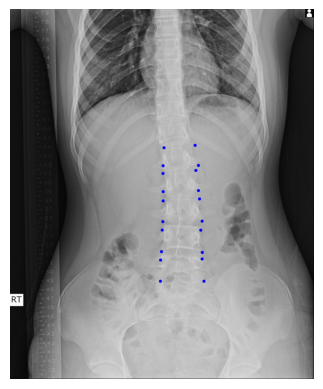

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# โหลดโมเดลที่ถูกฝึกไว้
model = YOLO('/content/best.pt')

# ทดสอบบนภาพ
image_path = '/content/drive/MyDrive/Year3/comvi/project-lumbar-spine/LSPINE-3/AP/train/0003-F-013Y0.jpg'
results = model.predict(source=image_path, show=False)

# อ่านภาพจากไฟล์
image = cv2.imread(image_path)

# ดึงขนาดของภาพ
height, width, channels = image.shape
print(f"ขนาดของภาพ: สูง = {height}, กว้าง = {width}, ช่องสี = {channels}")

# ดึงข้อมูล keypoints จากผลลัพธ์
for result in results:
    if hasattr(result, 'keypoints'):
        keypoints = result.keypoints  # ดึง keypoints โดยตรง
        if keypoints is not None:
            # ดึงข้อมูล xy และ conf
            xy = keypoints.xy.cpu().numpy()  # พิกัด x, y
            conf = keypoints.conf.cpu().numpy() if keypoints.conf is not None else None  # ความเชื่อมั่น

            # Normalization
            xy_normalized = xy / np.array([width, height])  # Normalize พิกัด x, y
            print("Normalized XY Coordinates:", xy_normalized)  # แสดงพิกัดที่ทำ normalization

            # แปลงข้อมูล keypoints ให้เป็นพิกัดจริง
            keypoints_real = xy_normalized * np.array([width, height])

            # วาด keypoints ลงในภาพ
            for i in range(keypoints_real.shape[1]):  # เปลี่ยนเป็น keypoints_real.shape[1] เพื่อเข้าถึงจำนวน keypoints
                x, y = int(keypoints_real[0][i][0]), int(keypoints_real[0][i][1])  # แปลงเป็นจำนวนเต็ม
                cv2.circle(image, (x, y), 10, (255, 0, 0), -1)  # วาดจุด keypoint เป็นสีแดงและขนาดใหญ่ขึ้น

# แสดงภาพที่มี keypoints
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # แปลงสีจาก BGR เป็น RGB
plt.axis('off')  # ไม่แสดงแกน
plt.show()  # แสดงภาพ
